In [1]:
import subprocess

subprocess.run(["bash", "run_mapreduce.sh"])

Deleted /user/hadoop/output/hypo4_religion


25/06/24 22:04:46 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.


packageJobJar: [mapper.py, reducer.py] [] /tmp/streamjob6235314209988805597.jar tmpDir=null


25/06/24 22:04:47 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
25/06/24 22:04:47 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
25/06/24 22:04:47 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
25/06/24 22:04:47 INFO mapred.FileInputFormat: Total input files to process : 1
25/06/24 22:04:47 INFO mapreduce.JobSubmitter: number of splits:2
25/06/24 22:04:48 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local679465468_0001
25/06/24 22:04:48 INFO mapred.LocalDistributedCacheManager: Localized file:/home/ubuntu/data-project/hypothesis4/mapper.py as file:/app/hadoop/tmp/mapred/local/1750795488530/mapper.py
25/06/24 22:04:48 INFO mapred.LocalDistributedCacheManager: Localized file:/home/ubuntu/data-project/hypothesis4/reducer.py as file:/app/hadoop/tmp/mapred/local/1750795488531/reducer.py
25/06/24 22:04:49 INFO mapreduce.Job: T

general	9573,34485
higher	4444,15140
lower	655,1713


CompletedProcess(args=['bash', 'run_mapreduce.sh'], returncode=0)

In [2]:
!hdfs dfs -ls /user/hadoop/output/hypo4_religion

Found 2 items
-rw-r--r--   1 ubuntu supergroup          0 2025-06-24 22:04 /user/hadoop/output/hypo4_religion/_SUCCESS
-rw-r--r--   1 ubuntu supergroup         52 2025-06-24 22:04 /user/hadoop/output/hypo4_religion/part-00000


In [3]:
!hdfs dfs -cat /user/hadoop/output/hypo4_religion/part-00000

general	9573,34485
higher	4444,15140
lower	655,1713


In [4]:
# Get HDFS output
result = subprocess.run(
    ["hdfs", "dfs", "-cat", "/user/hadoop/output/hypo4_religion/part-00000"],
    capture_output=True,
    text=True
)

# Parse output into dictionary
counts = {}
for line in result.stdout.strip().split("\n"):
    key, value = line.strip().split("\t")
    counts[key] = value

print("Raw counts:", counts)

Raw counts: {'general': '9573,34485', 'higher': '4444,15140', 'lower': '655,1713'}


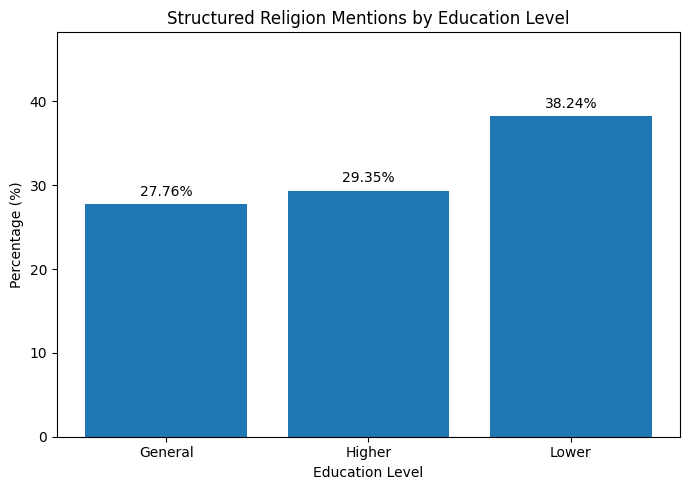

In [5]:
import matplotlib.pyplot as plt

# Parse structured and total counts
labels = []
ratios = []

for k, v in counts.items():
    structured, total = map(int, v.split(','))
    percent = (structured / total) * 100
    labels.append(k.capitalize())
    ratios.append(round(percent, 2))

# Plot
plt.figure(figsize=(7, 5))
plt.bar(labels, ratios)
plt.title("Structured Religion Mentions by Education Level")
plt.ylabel("Percentage (%)")
plt.xlabel("Education Level")
plt.ylim(0, max(ratios) + 10)

# Annotate bars
for i, val in enumerate(ratios):
    plt.text(i, val + 1, f"{val}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
